## Este algoritmo entrena un modelo con Epitopes de Influenza (tomando como dataset positivo Epitopes desde https://www.iedb.org/, y los epitopes negativos fueron tomados desde un articulo de referencia

      NumTiny  NumSmall  NumAliphatic  NumAromatic  NumNonPolar  NumPolar  \
0           2         4             2            3            6         2   
1           4         6             0            0            3         5   
2           3         4             2            1            4         4   
3           3         6             4            0            6         3   
4           3         4             4            2            8         1   
...       ...       ...           ...          ...          ...       ...   
2046        4        12             2            1            5         8   
2047        6         8             3            1            7         7   
2048        2         5             3            2            5         3   
2049        1         4             2            2            5         3   
2050        4         7             4            5           12         3   

      NumCharged  NumBasic  NumAcidic  PorcTiny  ...        z3        z4  \

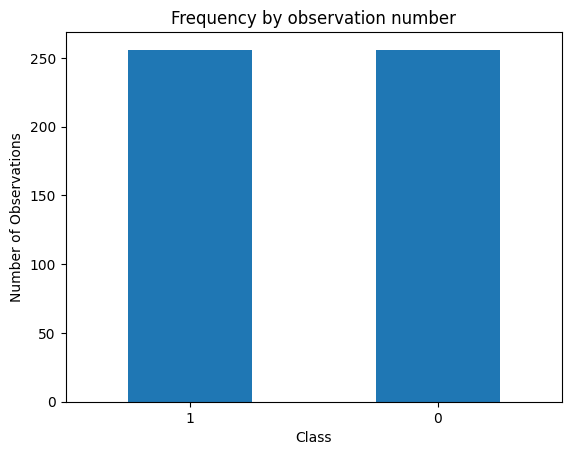

In [34]:
#MODULOS NECESARIOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from joblib import dump, load
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#ALGORITMO CLASIFICADOR
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
#RF,GaussianNB,DT,XGB,SVC

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)
#fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
#     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
#     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
#     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
#     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
#feature_coll =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiRef.csv', sep=',',usecols=cols)
print(df_ref)
X=df_ref[feature_cols]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
print(Xrandom)
Yrandom=df4.Class
print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)
count_classes = Yrandom.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

RF,GaussianNB,DT,XG,SVM
acc
[0.8118446601941746, 0.7286407766990289, 0.7216504854368933, 0.7074757281553397, 0.6924271844660194] [0.036217105948904406, 0.03886831091473006, 0.04311499528426006, 0.051824202356176186, 0.04295784639697035]
rec
[0.8007520468261029, 0.8423840607021595, 0.6350858378852721, 0.7435596403930369, 0.7491955415987683] [0.06347467852471292, 0.04877100030761788, 0.09192917164884035, 0.10158799273645686, 0.05844934712304023]
pre
[0.824104299134475, 0.6830525075390426, 0.7690804794653207, 0.6932722435179799, 0.6694792737475498] [0.05244876597879633, 0.051208599282264254, 0.07037342635877168, 0.0648283884079361, 0.0600487452109794]
f1
[0.8098269680028136, 0.7529147566558332, 0.6899025540341452, 0.7124800231959248, 0.7049017080141587] [0.03914602859770246, 0.03953679384858449, 0.05883424813677142, 0.05987594367236349, 0.04474376466019463]
matt
[0.6269464964267542, 0.4719811387808434, 0.4535147221848248, 0.4237117591562627, 0.3902641668088612] [0.07134245576482218, 0.073

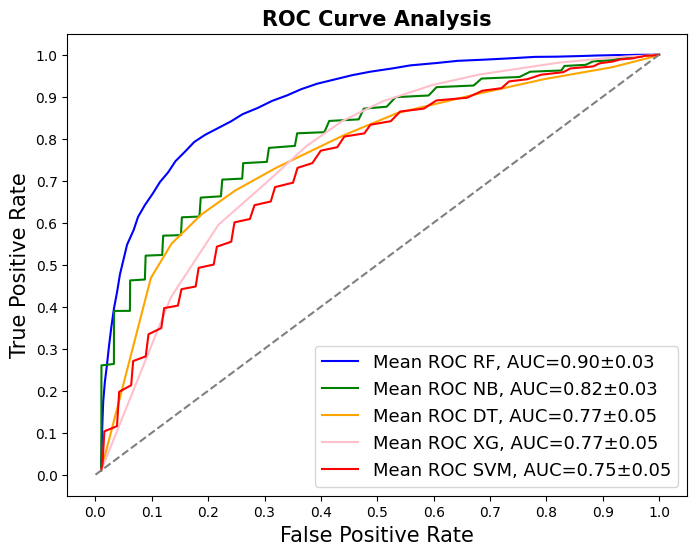

In [35]:
for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_cols]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
##RF,GaussianNB,DT,XGB,SVC
print("RF,GaussianNB,DT,XG,SVM")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_0.png')
plt.show()


#dump(cls, 'model.joblib') 

RF,GaussianNB,DT,XGB,SVC
acc
[0.7767961165048543, 0.6284466019417476, 0.7113592233009709, 0.713009708737864, 0.6518446601941748] [0.03654653167242328, 0.04406216313348549, 0.04584447103582527, 0.04287966049530553, 0.04787933745207485]
rec
[0.7846196995016298, 0.9170109658345837, 0.6498581152237594, 0.7666306128791662, 0.7307814439309884] [0.05644026895610558, 0.03528617192631776, 0.11144945079006888, 0.08786447409684127, 0.07417707723182314]
pre
[0.7715978221738561, 0.5781738218952827, 0.7510515678295836, 0.6925559651334315, 0.6342251618458218] [0.05548831590398032, 0.05484979883734526, 0.07064587122730996, 0.0625017878356722, 0.06818755384376168]
f1
[0.7758989194848169, 0.7074825728783644, 0.6879959547063104, 0.7231038966460815, 0.6747833380351619] [0.038546034297727405, 0.0428552638546257, 0.06250241639058887, 0.04879974323247723, 0.04737873874915887]
matt
[0.5562165571653164, 0.32121140083882027, 0.4346120583963345, 0.4345357029117471, 0.31472156146734453] [0.07316448879703319, 0.07

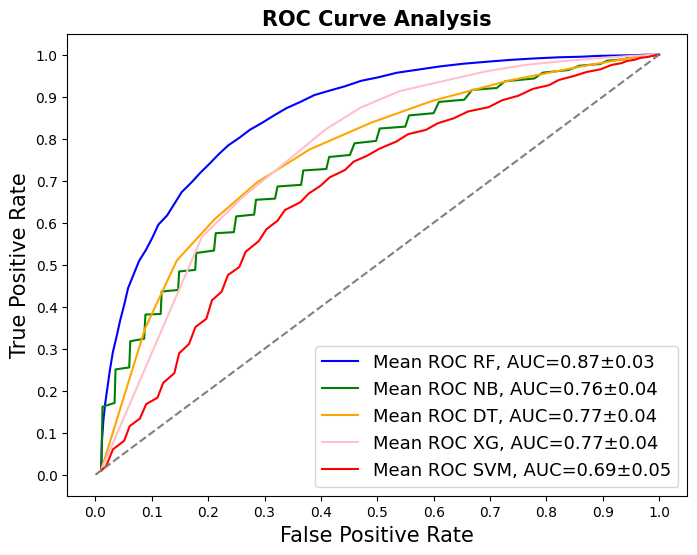

In [36]:
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
##RF,GaussianNB,DT,XGB,SVC         

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA 
fc1=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize','ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi','PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1','Blosum2', 't2']

X=df_ref[fc1]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc1]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
#RF,GaussianNB,DT,XGB,SVC 
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb=tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm =tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC 
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) 
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_1_anova.png')
plt.show()


#dump(cls, 'model.joblib') 

RF,GaussianNB,DT,XGB,SVC
acc
[0.7767961165048543, 0.6284466019417476, 0.7113592233009709, 0.713009708737864, 0.6518446601941748] [0.03654653167242328, 0.04406216313348549, 0.04584447103582527, 0.04287966049530553, 0.04787933745207485]
rec
[0.7846196995016298, 0.9170109658345837, 0.6498581152237594, 0.7666306128791662, 0.7307814439309884] [0.05644026895610558, 0.03528617192631776, 0.11144945079006888, 0.08786447409684127, 0.07417707723182314]
pre
[0.7715978221738561, 0.5781738218952827, 0.7510515678295836, 0.6925559651334315, 0.6342251618458218] [0.05548831590398032, 0.05484979883734526, 0.07064587122730996, 0.0625017878356722, 0.06818755384376168]
f1
[0.7758989194848169, 0.7074825728783644, 0.6879959547063104, 0.7231038966460815, 0.6747833380351619] [0.038546034297727405, 0.0428552638546257, 0.06250241639058887, 0.04879974323247723, 0.04737873874915887]
matt
[0.5562165571653164, 0.32121140083882027, 0.4346120583963345, 0.4345357029117471, 0.31472156146734453] [0.07316448879703319, 0.07

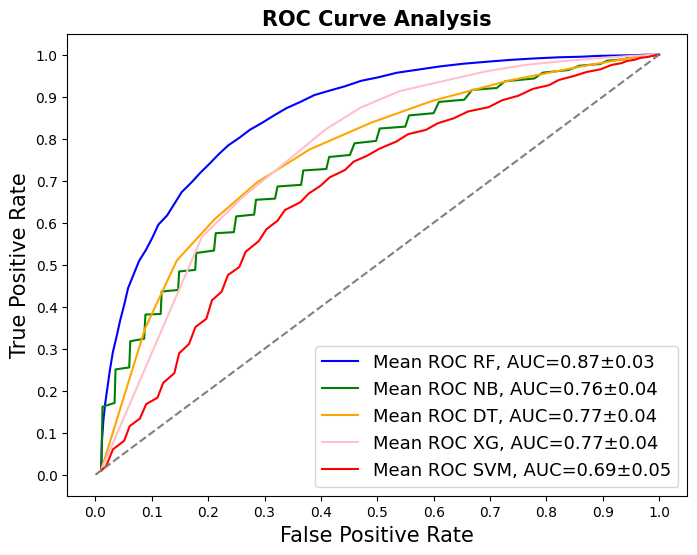

In [36]:
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
##RF,GaussianNB,DT,XGB,SVC         

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA 
fc1=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize','ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi','PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1','Blosum2', 't2']

X=df_ref[fc1]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc1]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
#RF,GaussianNB,DT,XGB,SVC 
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb=tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm =tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC 
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) 
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_1_anova.png')
plt.show()


#dump(cls, 'model.joblib') 

RF,GaussianNB,DT,XGB,SVC
acc
[0.8002912621359222, 0.7192233009708738, 0.7289320388349513, 0.719029126213592, 0.6882524271844658] [0.03765826564316026, 0.03926173258990203, 0.04277754076797665, 0.04822849125998879, 0.0436546788228654]
rec
[0.7959910848405438, 0.8058584645078558, 0.7051961380795744, 0.7705925731045986, 0.7524541103397324] [0.059697210606405586, 0.05175455008345425, 0.10477484513966008, 0.10105810027439958, 0.06065009947508563]
pre
[0.8054035418510703, 0.6831071295482505, 0.7508911376982951, 0.7045306000417249, 0.6664367008183488] [0.06081010911179049, 0.053904129131072134, 0.07383950038788638, 0.0692220513961917, 0.0637580887582239]
f1
[0.7982554528204665, 0.7374513360518823, 0.7196310563134429, 0.7300439323658678, 0.703919528404803] [0.04299233935883196, 0.038092202490489224, 0.05800046637004661, 0.05438982597242339, 0.043722498110053576]
matt
[0.6033997939437089, 0.44821270984459377, 0.46583316956677623, 0.4474010942187675, 0.3842999446719746] [0.07353286714562536, 0.0

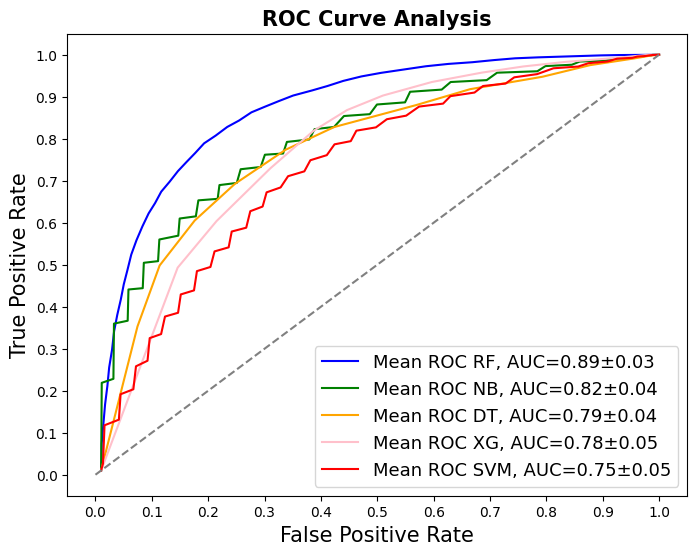

In [27]:
#mutualinfo
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
#("RF,GaussianNB,DT,XGB,SVM")       

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA 
fc2=['at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall', 'PorcPolar', 'ExtendedStructurePreference', 't1', 'z5', 'pKC', 'AlphaAndTurnPropensities', 'HelixBendPreference', 'at_hmoment_sheet', 'st3', 'st2', 'ElectronicProperties', 'z2', 't2', 'st7', 'PorcTiny', 'PorcCharged']

X=df_ref[fc2]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc2]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
##RF,GaussianNB,DT,XGB,SVC  
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC  
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) #gNB
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2])) #dt
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3])) #svc
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_2_mi.png')
plt.show()

In [28]:
##merge
fc_merge=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 
'at_pi','PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3',
't1', 'Blosum2','t2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 
'pKC','AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']


RF,GaussianNB,DT,XGB,SVC
acc
[0.7987378640776697, 0.7012621359223301, 0.7091262135922329, 0.7087378640776697, 0.6890291262135925] [0.03883143187934687, 0.04262688775874013, 0.05217342398417819, 0.04493373384623741, 0.0467323216610419]
rec
[0.806127713240862, 0.8428877545559876, 0.6613018626037396, 0.7443720964579054, 0.7453888847167732] [0.056540340855381184, 0.050273734026850106, 0.11233140582871748, 0.09381485140423931, 0.06314598754329082]
pre
[0.7937586010817144, 0.6583426190282797, 0.7409352245280216, 0.6991826581257559, 0.6695580981694047] [0.052771505509654065, 0.0522590249260771, 0.07881839301833009, 0.0630048463938568, 0.06443082580136128]
f1
[0.7984094400584621, 0.7377279702063666, 0.6901104128956175, 0.7159792043506232, 0.7028769230731949] [0.04260846656703937, 0.04040376562128383, 0.0658681410906906, 0.05229274698245585, 0.04756186978352286]
matt
[0.5979212890171468, 0.41961026834798026, 0.42869724426347233, 0.424461174088316, 0.38408028075640865] [0.0772863686955829, 0.082

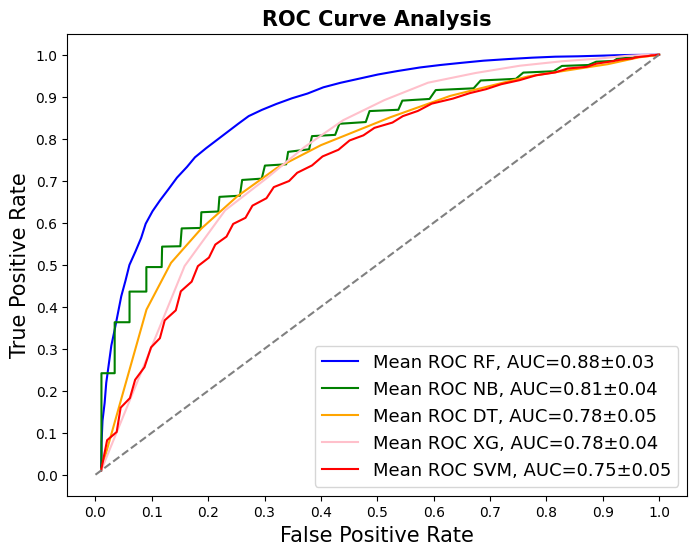

In [29]:
#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)


X=df_ref[fc_merge]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
#print(df_ref.iloc[np.random.random_integers(256,2050,256),0:74])
df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
df3=df_ref.iloc[0:256,0:74]
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
#print(Xrandom)
Yrandom=df4.Class
#print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df3=df_ref.iloc[0:255,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc_merge]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
#RF,GaussianNB,DT,XGB,SVC 
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC 
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_3_mix.png')
plt.show()

RandomForestClassifier(random_state=123, warm_start=True)
[0.8852427184466017] [0.03253166123853831]
[0.9471843615667233] [0.02673741326188185]
[0.8444299212845796] [0.04682719724419453]


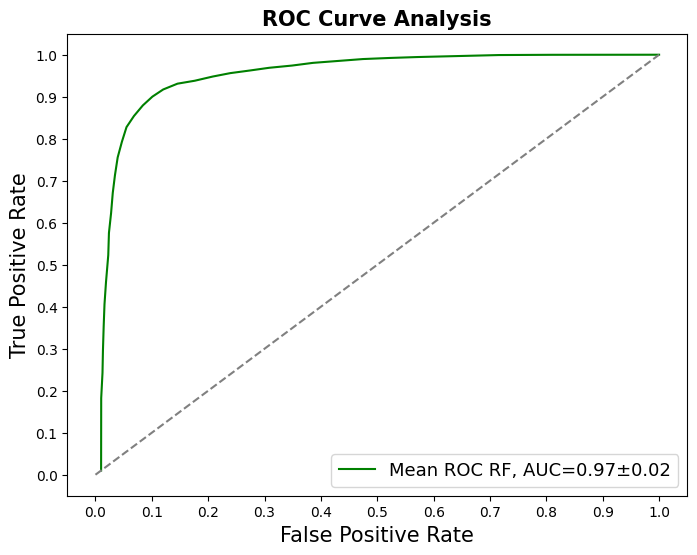

In [27]:
#
# ALGORITMO 2 PARA CUANDO YA ESTÁ CARGADO EL MODELO model.joblib
from sklearn.ensemble import RandomForestClassifier
#from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##CARGAR MODELO GUARDADO ANTERIORMENTE

result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = range(0, 100)

fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']
cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiRef.csv', sep=',',usecols=cols)
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc3]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        X_prueba=X_test
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_rf=result_table['fpr'][0:99]
tpr_rf=result_table['tpr'][0:99]
fpr_rf =fpr_rf.to_list()
tpr_rf =tpr_rf.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0

for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

###########
plt.figure(figsize=(8,6))
clasif = ["RF"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
#plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
#plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
#plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_Model.png')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier
import random
# Supongamos que tienes un modelo ya entrenado (modelo_rf)
# modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# modelo_rf.fit(X_entrenamiento, y_entrenamiento)

# Ahora, tienes nuevos datos de prueba (X_prueba)
# X_prueba = ...

# Realiza predicciones en los nuevos datos
print(X_prueba)
predicciones = cls.predict(X_prueba)


[[ 3.29936164e-03  5.51404353e-03  2.16728599e-03 ... -1.03084595e-02
   3.25907667e-02  2.93316901e-01]
 [ 3.51498763e-03  4.51034304e-03  1.74379891e-03 ... -1.09798501e-02
   2.53456610e-01  2.02769850e-01]
 [ 4.21017955e-03  3.82368967e-03  2.47386403e-03 ...  2.65571969e-03
   2.50835390e-01  2.19480966e-01]
 ...
 [ 5.23624714e-03  6.58139668e-03  2.28853724e-03 ...  2.87740062e-04
   1.67290734e-01  2.00748881e-01]
 [ 3.13691499e-03  4.90636716e-03  2.31950444e-03 ...  5.61299992e-03
   3.34704156e-01  2.67759175e-01]
 [ 4.44965807e-03  2.64776491e-03  1.52946900e-03 ...  1.72215800e-03
   3.61291889e-01  2.00717716e-01]]


In [ ]:
# Si tienes etiquetas reales para comparar, compara las predicciones con las etiquetas reales
y_prueba_real = random.sample([0]*30 + [1]*73, 103)
print(y_prueba_real)

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)

# Imprime la exactitud u otra métrica de interés
print(f'Exactitud del modelo en los nuevos datos de prueba: {exactitud}')
